In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras import optimizers 

import yfinance as yf
seed = 1234
np.random.seed(seed)
plt.style.use('ggplot')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
ticker = "eth-usd"
dataraw  = yf.download(ticker)
dataraw

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2023-05-17,1824.068359,1835.554565,1786.671997,1821.859619,1821.859619,6352161579
2023-05-18,1822.068237,1831.450317,1774.195068,1801.728516,1801.728516,5673124255
2023-05-19,1800.994385,1826.194214,1797.434448,1812.589478,1812.589478,4796110259


In [3]:
dataraw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2.020000e+03
mean,1168.873849,1205.048417,1128.380211,1169.403094,1169.403094,1.258032e+10
std,1156.381777,1191.075533,1116.510896,1155.865916,1155.865916,1.049693e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,219.625504,224.769302,212.825138,219.626705,219.626705,4.840974e+09
50%,614.954651,635.118591,590.405487,615.129272,615.129272,1.005766e+10
75%,1802.000183,1837.045532,1746.958099,1804.206024,1804.206024,1.750876e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,4812.087402,8.448291e+10


# Feature Selection

 Count row of data:  2020


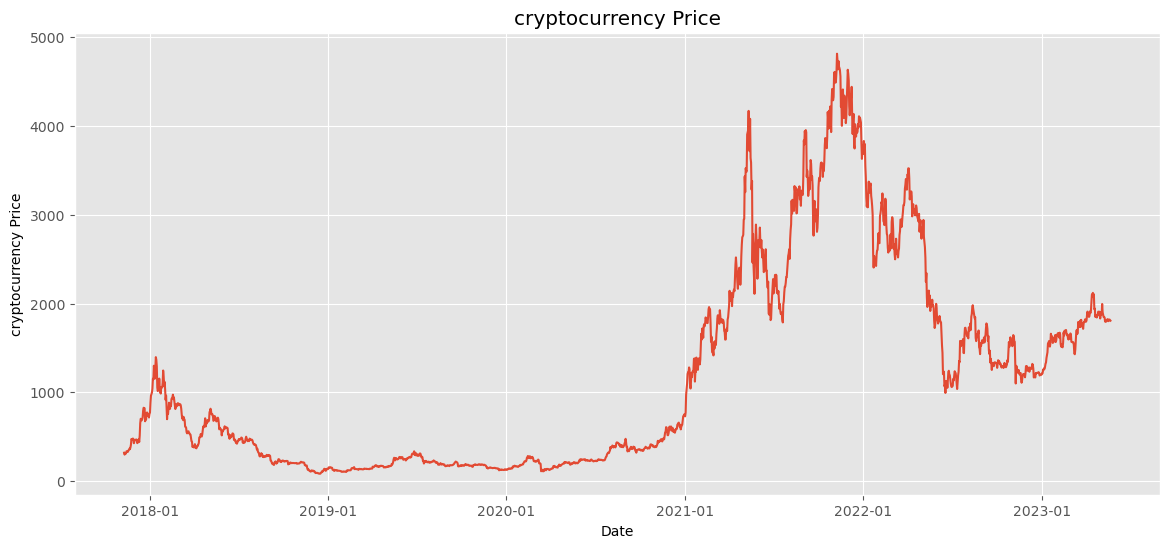

In [4]:
# use feature 'Date' & 'Close'
dataset = pd.DataFrame(dataraw['Close'])
print(' Count row of data: ',len(dataset))

fig = plt.figure(figsize=(14, 6))
plt.plot(dataset)
plt.xlabel('Date')
plt.ylabel('cryptocurrency Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('cryptocurrency Price')
plt.show()

# Preprocessing Data

## Normalization Min-Max

In [5]:
#Min-Max Normalization
dataset_norm = dataset.copy()
dataset[['Close']]
scaler = MinMaxScaler()
dataset_norm['Close'] = scaler.fit_transform(dataset[['Close']])
dataset_norm

,Close
Date,
2017-11-09,0.050040
2017-11-10,0.045464
2017-11-11,0.048727
2017-11-12,0.047295
2017-11-13,0.049158
...,...
2023-05-17,0.367520
2023-05-18,0.363262
2023-05-19,0.365559


## Graph Data Normalized

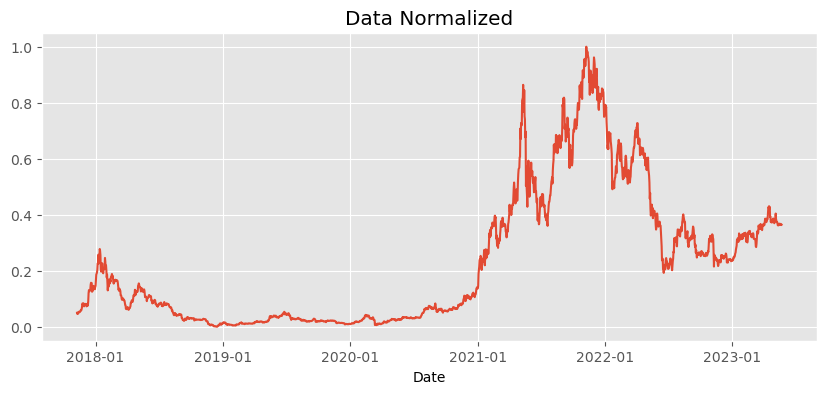

In [6]:
fig = plt.figure(figsize=(10, 4))
plt.plot(dataset_norm)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Normalized')
plt.show()

## Data Partition

In [7]:
# Partition data into data train, val & test
totaldata = dataset.values
totaldatatrain = int(len(totaldata)*0.7)
totaldataval = int(len(totaldata)*0.1)
totaldatatest = int(len(totaldata)*0.2)

# Store data into each partition
training_set = dataset_norm[0:totaldatatrain]
val_set=dataset_norm[totaldatatrain:totaldatatrain+totaldataval]
test_set = dataset_norm[totaldatatrain+totaldataval:]

### Training Data Graph

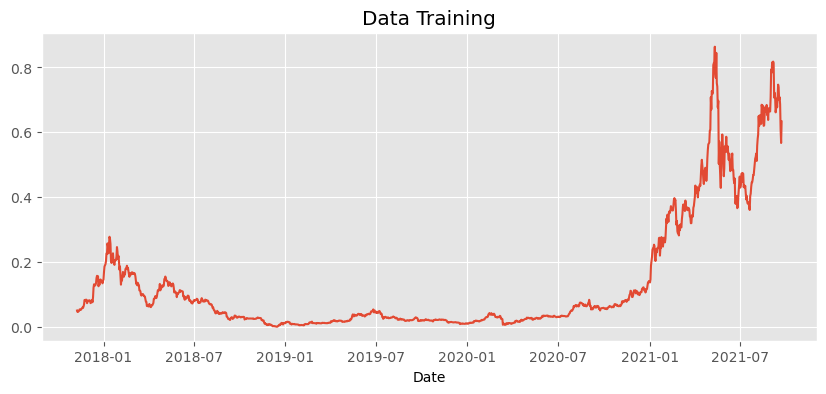

In [8]:
# graph of data training
fig = plt.figure(figsize=(10, 4))
plt.plot(training_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Training')
plt.show()

### Data Validation Graph

,Close
Date,
2021-09-23,0.649611
2021-09-24,0.602262
2021-09-25,0.600971
2021-09-26,0.629885
2021-09-27,0.602784
...,...
2022-04-08,0.657342
2022-04-09,0.672114
2022-04-10,0.661528


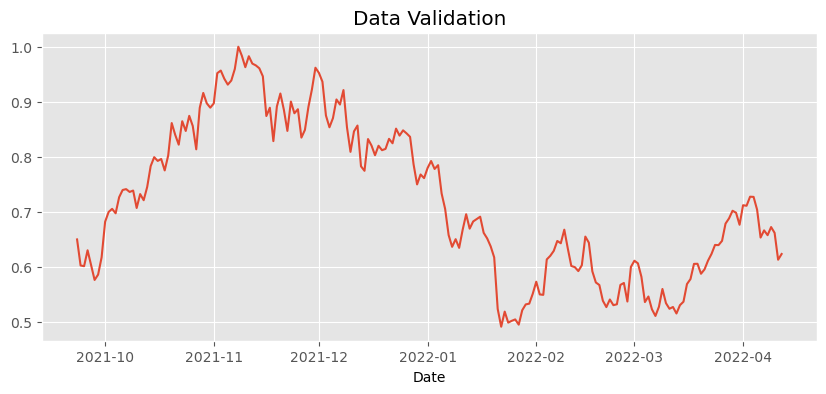

In [9]:
# graph of data validation
fig = plt.figure(figsize=(10, 4))
plt.plot(val_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Validation')
val_set

### Data Test Graph

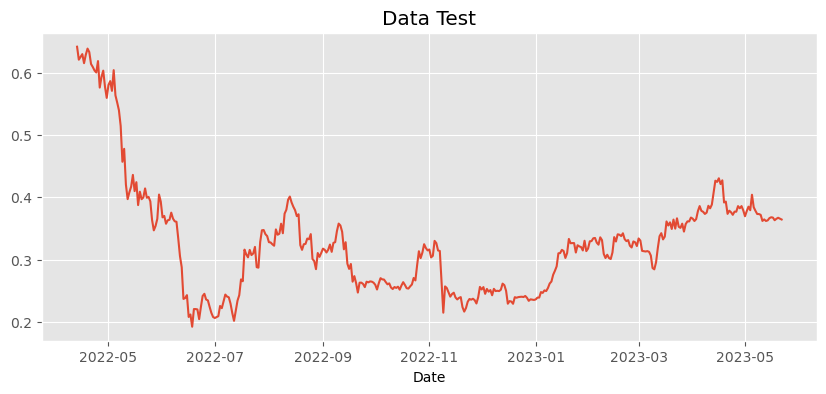

,Close
Date,
2022-04-13,0.641747
2022-04-14,0.620926
2022-04-15,0.625369
2022-04-16,0.629894
2022-04-17,0.615320
...,...
2023-05-17,0.367520
2023-05-18,0.363262
2023-05-19,0.365559


In [10]:
# graph of data test
fig = plt.figure(figsize=(10, 4))
plt.plot(test_set)
plt.xlabel('Date')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.title('Data Test')
plt.show()
test_set

## Sliding Windows

In [11]:
# Initiaton value of lag
lag = 2
# sliding windows function
def create_sliding_windows(data,len_data,lag):
    x=[]
    y=[]
    for i in range(lag,len_data):
        x.append(data[i-lag:i,0])
        y.append(data[i,0]) 
    return np.array(x),np.array(y)

# Formating data into array for create sliding windows
array_training_set = np.array(training_set)
array_val_set = np.array(val_set)
array_test_set = np.array(test_set)

# Create sliding windows into training data
x_train, y_train = create_sliding_windows(array_training_set,len(array_training_set), lag)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
# Create sliding windows into validation data
x_val,y_val = create_sliding_windows(array_val_set,len(array_val_set),lag)
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))
# Create sliding windows into test data
x_test,y_test = create_sliding_windows(array_test_set,len(array_test_set),lag)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [12]:
# Hyperparameters
learning_rate = 0.0001
hidden_unit = 64
batch_size=256
epoch = 100

# Architecture Gated Recurrent Unit
regressorLSTM = Sequential()

# First GRU layer with dropout
regressorLSTM.add(LSTM(units=hidden_unit, return_sequences=True, input_shape=(x_train.shape[1],1), activation = 'tanh'))
regressorLSTM.add(Dropout(0.2))
# Second GRU layer with dropout
regressorLSTM.add(LSTM(units=hidden_unit, return_sequences=True, activation = 'tanh'))
regressorLSTM.add(Dropout(0.2))
# Third GRU layer with dropout
regressorLSTM.add(LSTM(units=hidden_unit, return_sequences=False, activation = 'tanh'))
regressorLSTM.add(Dropout(0.2))

# Output layer
regressorLSTM.add(Dense(units=1))

# Compiling the lstm Unit
regressorLSTM.compile(optimizer=optimizers.Adam(learning_rate),loss='mean_squared_error')

# Fitting ke data training dan data validation
pred = regressorLSTM.fit(x_train, y_train, validation_data=(x_val,y_val), batch_size=batch_size, epochs=epoch)

Epoch 1/100
6/6 [==============================] - 5s 186ms/step - loss: 0.0504 - val_loss: 0.5308
Epoch 2/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0492 - val_loss: 0.5231
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0480 - val_loss: 0.5153
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0468 - val_loss: 0.5073
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0457 - val_loss: 0.4991
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0445 - val_loss: 0.4907
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0433 - val_loss: 0.4819
Epoch 8/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0422 - val_loss: 0.4725
Epoch 9/100
6/6 [==============================] - 0s 13ms/step - loss: 0.0409 - val_loss: 0.4629
Epoch 10/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0398 - val_loss: 0.4527
Epoch 11/100
6/6 [

Epoch 83/100
6/6 [==============================] - 0s 13ms/step - loss: 9.2333e-04 - val_loss: 0.0029
Epoch 84/100
6/6 [==============================] - 0s 12ms/step - loss: 9.8464e-04 - val_loss: 0.0027
Epoch 85/100
6/6 [==============================] - 0s 13ms/step - loss: 9.1246e-04 - val_loss: 0.0027
Epoch 86/100
6/6 [==============================] - 0s 14ms/step - loss: 8.7775e-04 - val_loss: 0.0028
Epoch 87/100
6/6 [==============================] - 0s 14ms/step - loss: 7.9248e-04 - val_loss: 0.0029
Epoch 88/100
6/6 [==============================] - 0s 13ms/step - loss: 9.0012e-04 - val_loss: 0.0029
Epoch 89/100
6/6 [==============================] - 0s 12ms/step - loss: 8.1212e-04 - val_loss: 0.0028
Epoch 90/100
6/6 [==============================] - 0s 10ms/step - loss: 8.1677e-04 - val_loss: 0.0029
Epoch 91/100
6/6 [==============================] - 0s 13ms/step - loss: 8.9401e-04 - val_loss: 0.0029
Epoch 92/100
6/6 [==============================] - 0s 13ms/step - loss: 

## Graph Training loss & Validation Loss

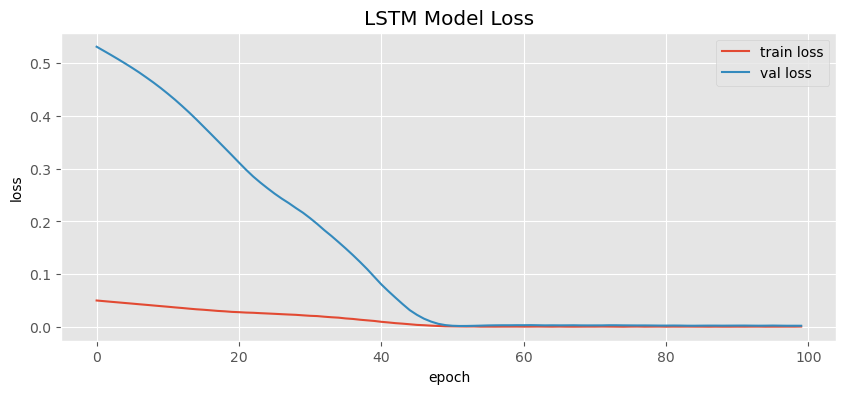

In [13]:
# Graph model loss (train loss & val loss)
fig = plt.figure(figsize=(10, 4))
plt.plot(pred.history['loss'], label='train loss')
plt.plot(pred.history['val_loss'], label='val loss')
plt.title('LSTM Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

## Training Loss & Validation Loss Table

In [14]:
# Tabel value of training loss & validation loss
learningrate_parameter = learning_rate
train_loss=pred.history['loss'][-1]
validation_loss=pred.history['val_loss'][-1]
learningrate_parameter=pd.DataFrame(data=[[learningrate_parameter, train_loss, validation_loss]],
                                    columns=['Learning Rate', 'Training Loss', 'Validation Loss'])
learningrate_parameter.set_index('Learning Rate')

,Training Loss,Validation Loss
Learning Rate,,
0.0001,0.001096,0.002601


## Implementation Model into Data Test

In [15]:

# Make predictions on the test data
y_pred = regressorLSTM.predict(x_test)
# Rescale the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
# Calculate the RMSE
mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Calculate the MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error:", mape)


13/13 [==============================] - 1s 2ms/step
Mean Squared Error: 13910.333152613042
Root Mean Squared Error: 117.94207541252207
Mean Absolute Percentage Error: 6.507721500486411


## Comparison Data Test with Prediction Results

In [16]:
# Comparison data test with data prediction
datacompare = pd.DataFrame()
datatest=np.array(dataset['Close'][totaldatatrain+totaldataval+lag:])
datapred= y_pred

datacompare['Data Test'] = datatest
datacompare['Prediction Results'] = datapred
datacompare

,Data Test,Prediction Results
0,3040.916504,3103.932861
1,3062.310303,3020.753174
2,2993.403320,3044.765137
3,3057.606689,3047.149414
4,3104.106445,3001.119873
...,...,...
397,1821.859619,1723.674438
398,1801.728516,1728.446289
399,1812.589478,1722.347290
400,1820.478027,1708.581177


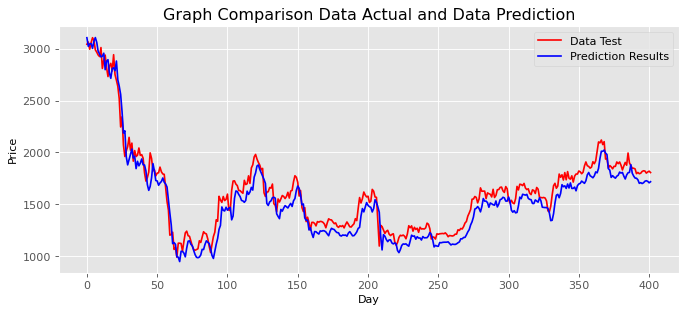

In [17]:
# Create graph data test and prediction result
plt.figure(num=None, figsize=(10, 4), dpi=80,facecolor='w', edgecolor='k')
plt.title('Graph Comparison Data Actual and Data Prediction')
plt.plot(datacompare['Data Test'], color='red',label='Data Test')
plt.plot(datacompare['Prediction Results'], color='blue',label='Prediction Results')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()
